#### ex 1:
##### 对 Runge 函数：
$$
R(x) = \frac{1}{1+x^2},\quad x\in[-5,5]
$$
##### 利用下列条件做插值、逼近并与 $R(x)$ 的图像进行比较
##### (1) 用等距节点 $x_i = -5 + i \; (i = 0, 1, \cdots, 10)$, 绘出它的 10 次  Newton 插值多项式的图像;
##### (2) 用节点 $x_i = 5 \cos \left ( \frac{2i+1}{42} \pi \right ) \; (i = 0, 1, \cdots, 20)$, 绘出它的 20 次 Lagrange 插值多项式的图像;
##### (3) 用等距节点 $x_i = -5 + i \; (i = 0, 1, \cdots, 10)$, 绘出它的分段线性插值函数的图像.


##### Newton interpolation 
$$
f(x) \approx N_n(x) = f[x_0] + f[x_0, x_1] (x - x_0) + \cdots + f[x_0, x_1, \cdots, x_{n-1}] (x - x_0)(x - x_1) \cdots (x - x_{n-1}).
$$

##### *Remark*:
$$
f[x_0, x_1, \cdots, x_k] = \sum_{j = 0}^k \frac{f(x_j)}{(x_j - x_0)(x_j - x_1) \cdots (x_j - x_{j-1})(x_j - x_{j+1}) \cdots (x_j - x_k)}.
$$

##### Lagrange interpolation
$$
f(x) \approx L_n(x) = \sum_{i = 0}^n f(x_i) l_i(x) \quad \text{with} \quad l_i(x) = \prod_{j \neq i} \frac{x - x_j}{x_i - x_j}
$$

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from make_dir import mkdir
mkdir(file_dir="./figure")

file make direction sucessfully!


In [2]:
def R(x):
    return 1.0 / (1.0 + x**2)

In [3]:
def newton_interp(grids, x):
    
    grid_x, grid_y = grids
    if len(grid_x) != len(grid_y):
        print("Error: Length of grid_x and grid_y must be the same !")
    
    else:
        newton_sum, basis_func = 0.0, 1.0
        for i in range(len(grid_x)): 
            coef = 0.0
            for j in range(i + 1):
                g = 1.0
                for k in range(i + 1):
                    if k != j:
                        dist = grid_x[j] - grid_x[k]
                        if abs(dist) > 1.0e-8:
                            g *= dist
                        else: # can be optimized
                            print("[Error: The distance between x_{:d} and x_{:d} are too small !]".format(k, j))
            
                coef += grid_y[j] / g
            newton_sum += coef * basis_func
            basis_func *= x - grid_x[i]  

        return newton_sum

In [4]:
def _newton_interp(grids, x):
    
    grid_x, grid_y = grids
    size_x = len(grid_x)

    D = np.zeros((size_x, size_x))
    D[:, 0] = grid_y
    for j in range(1, size_x):
        for k in range(j, size_x):
            D[k, j] = (D[k, j-1] - D[k-1, j-1]) / (grid_x[k] - grid_x[k-j])

    newton_sum, basis_func = 0.0, 1.0
    for i in range(size_x):
        newton_sum += D[i, i] * basis_func
        basis_func *= x - grid_x[i]    
    
    return newton_sum
        

In [5]:
x = np.linspace(-5, 5, 11)
xx = np.linspace(-5, 5, 101)

In [6]:
# magic func
%timeit newton_interp(grids = [x, R(x)], x = xx)

213 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [8]:
# newton_interp(grids = [x, R(x)], x = xx) # ctrl + /

array([ 0.03846154,  1.23031656,  1.80438546,  1.95895184,  1.84584537,
        1.57872099,  1.24021349,  0.88808115,  0.56044444,  0.28021759,
        0.05882353, -0.10072426, -0.20129636, -0.24960819, -0.25460267,
       -0.22619629, -0.17433546, -0.10831517, -0.03631685,  0.03487332,
        0.1       ,  0.15535857,  0.19872622,  0.22922733,  0.24715355,
        0.25375546,  0.25102057,  0.24144943,  0.2278397 ,  0.21308581,
        0.2       ,  0.1911589 ,  0.18877837,  0.19461783,  0.2099145 ,
        0.23534659,  0.27102411,  0.31650482,  0.37083275,  0.43259596,
        0.5       ,  0.5709536 ,  0.64316255,  0.71422826,  0.78174713,
        0.84340743,  0.89708035,  0.9409023 ,  0.97334592,  0.99327763,
        1.        ,  0.99327763,  0.97334592,  0.9409023 ,  0.89708035,
        0.84340743,  0.78174713,  0.71422826,  0.64316255,  0.5709536 ,
        0.5       ,  0.43259596,  0.37083275,  0.31650482,  0.27102411,
        0.23534659,  0.2099145 ,  0.19461783,  0.18877837,  0.19

In [9]:
# _newton_interp(grids = [x, R(x)], x = xx)

array([ 0.03846154,  1.23031656,  1.80438546,  1.95895184,  1.84584537,
        1.57872099,  1.24021349,  0.88808115,  0.56044444,  0.28021759,
        0.05882353, -0.10072426, -0.20129636, -0.24960819, -0.25460267,
       -0.22619629, -0.17433546, -0.10831517, -0.03631685,  0.03487332,
        0.1       ,  0.15535857,  0.19872622,  0.22922733,  0.24715355,
        0.25375546,  0.25102057,  0.24144943,  0.2278397 ,  0.21308581,
        0.2       ,  0.1911589 ,  0.18877837,  0.19461783,  0.2099145 ,
        0.23534659,  0.27102411,  0.31650482,  0.37083275,  0.43259596,
        0.5       ,  0.5709536 ,  0.64316255,  0.71422826,  0.78174713,
        0.84340743,  0.89708035,  0.9409023 ,  0.97334592,  0.99327763,
        1.        ,  0.99327763,  0.97334592,  0.9409023 ,  0.89708035,
        0.84340743,  0.78174713,  0.71422826,  0.64316255,  0.5709536 ,
        0.5       ,  0.43259596,  0.37083275,  0.31650482,  0.27102411,
        0.23534659,  0.2099145 ,  0.19461783,  0.18877837,  0.19

In [7]:
%timeit _newton_interp(grids = [x, R(x)], x = xx)

78.9 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
max(abs(_newton_interp(grids = [x, R(x)], x = xx) - newton_interp(grids = [x, R(x)], x = xx)))

1.6342482922482304e-13

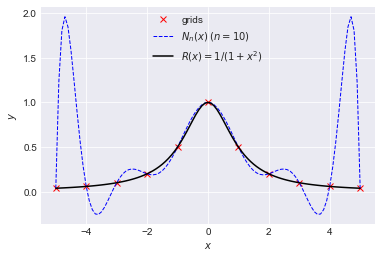

In [11]:
x = np.linspace(-5, 5, 11)
# x = 5.0 * np.cos((2.0*x + 1.0) / 42.0 * np.pi)
xx = np.linspace(-5, 5, 101)
y = _newton_interp(grids = [x, R(x)], x = xx)
plt.style.use("seaborn-dark") 
fig = plt.figure()
plt.plot(x, R(x), color = "r", linewidth = 0.0, marker = "x", label = "grids")
plt.plot(xx, y, color = "b", linewidth = 1.0, linestyle = 'dashed', label = "$N_n(x) \; (n = 10)$")
plt.plot(xx, R(xx), color = "k", label = "$R(x) = 1 / (1+x^2)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()
# plt.savefig("./figure/newton_interpolation.pdf")
plt.show()

In [12]:
def lagrange_interp(grids, x): 

    grid_x, grid_y = grids
    if len(grid_x) != len(grid_x):
        print("Error: Length of grid_x and grid_y must be the same !")
        
    else:
        lagrange_sum = 0.0
        length = len(grid_x)
        for i in range(length):
            x_i = grid_x[i]
            basis_func = 1.0
            for j in range(length):
                if (i != j):
                    dist = x_i - grid_x[j] 
                    if abs(dist) > 1.0e-8:
                        basis_func *= (x - grid_x[j]) / dist
                    else: # can be optimized
                        print("[Error: The distance between x_{:d} and x_{:d} are too small !]".format(i, j))
                        
            lagrange_sum += grid_y[i] * basis_func

        return lagrange_sum

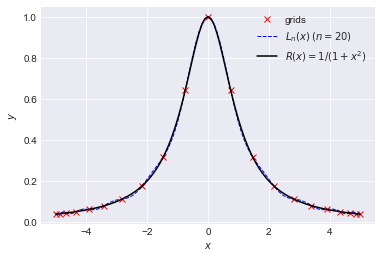

In [13]:
index = np.linspace(0, 20, 21)
x = 5.0 * np.cos((2.0*index + 1.0) / 42.0 * np.pi)
xx = np.linspace(-5, 5, 101)
y = lagrange_interp(grids = [x, R(x)], x = xx)
plt.style.use("seaborn-dark") 
fig = plt.figure()
plt.plot(x, R(x), color = "r", linewidth = 0.0, marker = "x", label = "grids")
plt.plot(xx, y, color = "b", linewidth = 1.0, linestyle = 'dashed', label = "$L_n(x) \; (n = 20)$")
plt.plot(xx, R(xx), color = "k", label = "$R(x) = 1 / (1+x^2)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()
# plt.savefig("./figure/lagrange_interpolation.pdf")
plt.show()

In [14]:
def linear_interp(grids, x):
    grid_x, grid_y = grids
    if len(grid_x) != len(grid_x):
        print("Error: Length of grid_x and grid_y must be the same !")
        
    else:
        order = np.argsort(grid_x)
        grid_x, grid_y = grid_x[order], grid_y[order]
        
        linear_sum = 0.0
        for i in range(len(grid_x)-1):
            dist = grid_x[i+1] - grid_x[i]
            if abs(dist) > 1.0e-8:
                basis_func = (grid_y[i] * (grid_x[i+1] - x) + grid_y[i+1] * (x - grid_x[i])) / (grid_x[i+1] - grid_x[i])
                func = lambda x: 1 if (x < grid_x[i+1] and x >= grid_x[i]) else 0.0
                cond = np.array(list(map(func, x)))
                linear_sum += basis_func * cond
            else: # can be optimized
                print("[Error: The distance between x_{:d} and x_{:d} are too small !]".format(i, i+1))

        return linear_sum

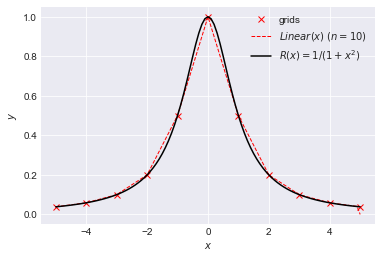

In [15]:
x = np.linspace(-5, 5, 11)
xx = np.linspace(-5, 5, 101)
y = linear_interp(grids = [x, R(x)], x = xx)
plt.style.use("seaborn-dark") 
fig = plt.figure()
plt.plot(x, R(x), color = "r", linewidth = 0.0, marker = "x", label = "grids")
plt.plot(xx, y, color = "r", linewidth = 1.0, linestyle = 'dashed', label = "$Linear(x) \; (n = 10)$")
plt.plot(xx, R(xx), color = "k", label = "$R(x) = 1 / (1+x^2)$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend()
# plt.savefig("./figure/linear_interpolation.pdf")
plt.show()